[![AnalyticsDojo](https://github.com/rpi-techfundamentals/fall2018-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Fastai - Revisiting Titanic</h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>


In [0]:
from fastai import *
from fastai.tabular import * 
import numpy as np
import pandas as pd
import pandas as pd

train= pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/fall2018-materials/master/input/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/fall2018-materials/master/input/test.csv')



In [2]:
#Create a categorical variable from the family count 
def family(x):
    if x < 2:
        return 'Single'
    elif x == 2:
        return 'Couple'
    elif x <= 4:
        return 'InterM'
    else:
        return 'Large'


for df in [train, test]:
    df['Title'] = df['Name'].str.split(',').str[1].str.split(' ').str[1]
    df['Title'] = df['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')
    df['Age']=df['Age'].fillna(df['Age'].median())
    df['Fare']=df['Fare'].fillna(df['Fare'].median())
    df['Embarked']=df['Embarked'].fillna('S')
    df['NameLength'] = df['Name'].map(lambda x: len(x))
    df['FamilyS'] = df['SibSp'] + df['Parch'] + 1
    df['FamilyS'] = df['FamilyS'].apply(family)
train.isnull().sum(axis = 0)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
NameLength       0
FamilyS          0
dtype: int64

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NameLength,FamilyS
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,23,Couple
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,51,Couple
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,22,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,44,Couple
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,24,Single


In [0]:
dep_var = 'Survived'
cat_names = ['Pclass', 'Sex', 'Embarked', 'Title', 'FamilyS']
cont_names = ['Age', 'Fare', 'SibSp', 'Parch', 'NameLength']
procs = [FillMissing, Categorify, Normalize]
test_data = (TabularList.from_df(test, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs))



In [0]:

data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(0,200)))
                           .label_from_df(cols=dep_var)
                           .add_test(test_data, label=0)
                           .databunch())

In [6]:
#Shows the Data
data.show_batch()

Pclass,Sex,Embarked,Title,FamilyS,Age,Fare,SibSp,Parch,NameLength,target
2,male,S,Mr.,Couple,0.5653,-0.1432,0.5043,-0.4658,-0.4163,0
3,male,S,Mr.,Single,-0.3706,-0.4860,-0.4610,-0.4658,-0.6319,0
3,male,S,Mr.,Single,-0.1366,-0.4982,-0.4610,-0.4658,-0.5241,0
3,male,S,Mr.,Single,3.4510,-0.4883,-0.4610,-0.4658,-0.8475,0
3,male,S,Mr.,Couple,-0.9165,-0.5125,0.5043,-0.4658,-0.2008,0


In [0]:
#Define our Learner
learn = tabular_learner(data, layers=[300,100], metrics=accuracy)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


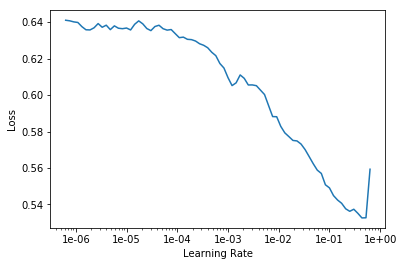

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
#fit the learner
learn.fit(7, 1e-2)  #Number of epocs and the learning rate. learn.save('final_train')

epoch,train_loss,valid_loss,accuracy,time
0,0.544682,0.566284,0.740000,00:00
1,0.490425,0.473522,0.845000,00:00
2,0.467682,0.453977,0.845000,00:00
3,0.448043,0.414292,0.830000,00:00
4,0.434118,0.406961,0.865000,00:00
5,0.424244,0.426844,0.855000,00:00
6,0.413750,0.411579,0.845000,00:00


In [10]:
#Show the results
learn.show_results()

Pclass,Sex,Embarked,Title,FamilyS,Age,Fare,SibSp,Parch,NameLength,target,prediction
3,male,S,Mr.,Couple,-0.6046,-0.4982,0.5043,-0.4658,-0.4163,0,0
1,female,C,Mrs.,Couple,0.6433,0.7144,0.5043,-0.4658,2.6017,1,1
3,female,S,Miss.,Single,-0.2926,-0.4855,-0.4610,-0.4658,-0.5241,1,0
1,female,S,Mrs.,Couple,0.4093,0.3700,0.5043,-0.4658,1.8472,1,1
3,male,S,Mr.,Single,0.4093,-0.4831,-0.4610,-0.4658,-0.3085,0,0


In [11]:
#This will get predictions
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = to_np(np.argmax(predictions, 1))
labels.shape




(418,)

In [0]:
#Writing to File
submission=pd.DataFrame(test.loc[:,['PassengerId']])
submission['Survived']=labels
#Any files you save will be available in the output tab below

submission.to_csv('submission.csv', index=False)

In [0]:
from google.colab import files
files.download('submission.csv')